# Explaining XGB Performance

In this notebok I will try some xAI techniques to understando how the XGB is performing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBClassifier, DMatrix, train, plot_importance
import shap
shap.initjs()


C:\Users\caio.rhoden_ifood\xai-nui-classification\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Imports

In [2]:
X_train = pd.read_pickle("../data/model_input/X_train.pkl")
y_train = pd.read_pickle("../data/model_input/y_train.pkl")
X_test = pd.read_pickle("../data/model_input/X_test.pkl")
y_test = pd.read_pickle("../data/model_input/y_test.pkl")

In [3]:
clf = pickle.load(open("../data/models/xgb.sav", 'rb'))

## SHAP

In [4]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


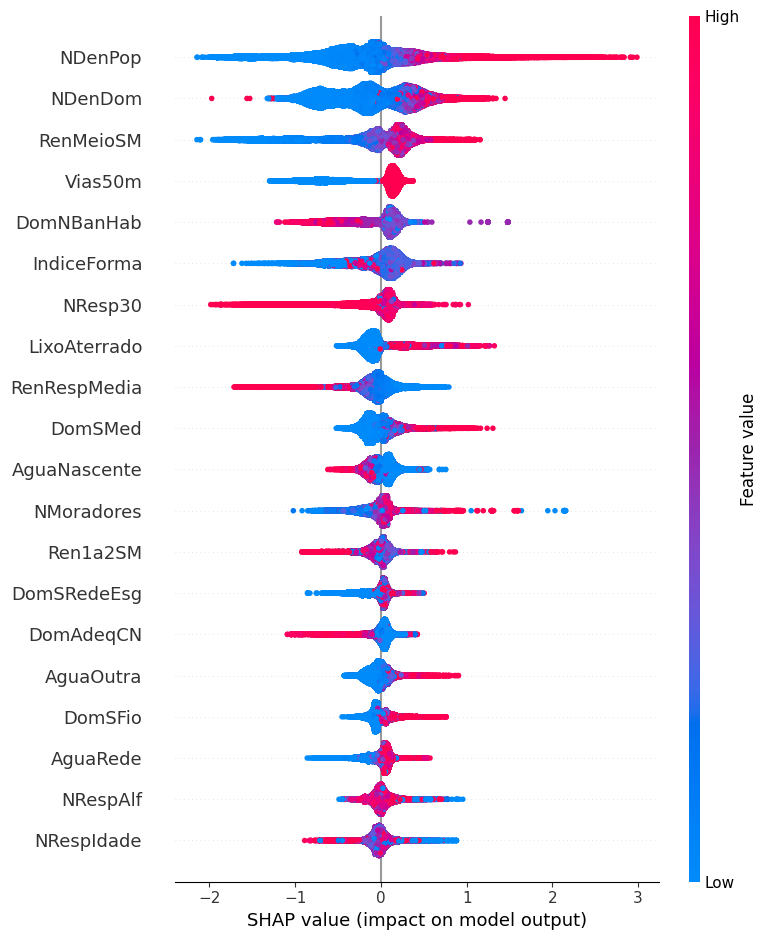

In [5]:
shap.summary_plot(shap_values, X_test)

## Feature Importance

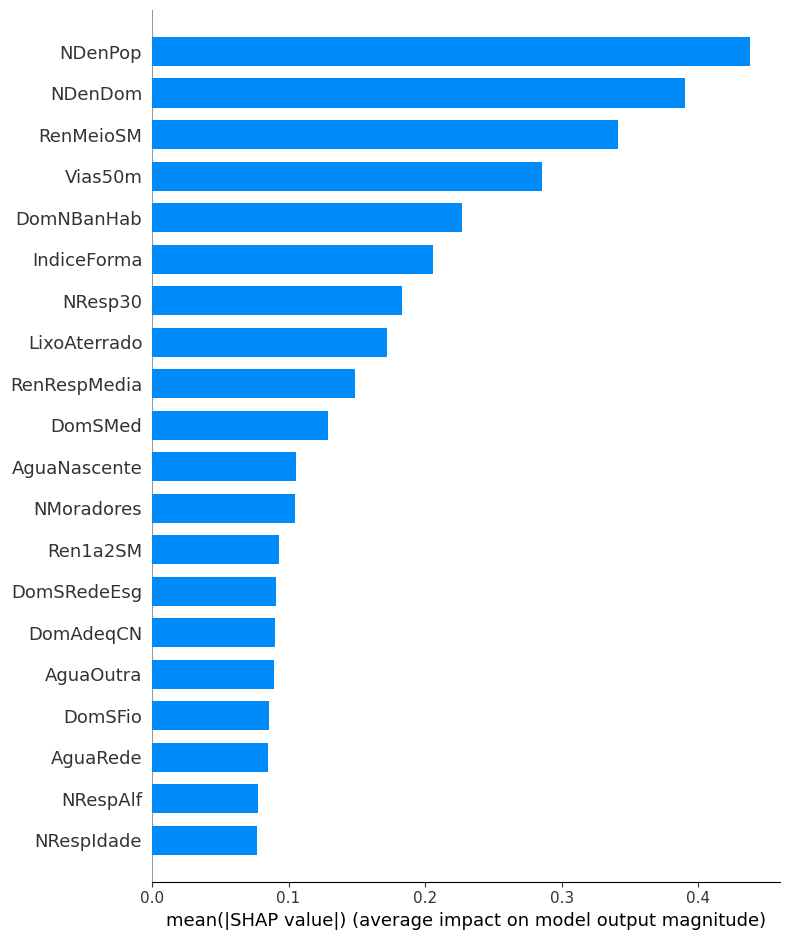

In [6]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Dependency Plot

In [7]:
feature_importance = ["NDenPop", "NDenDom", "RenMeioSM", "Vias50m", "DomNBanHab", "IndiceForma", "NResp30", "LixoAterrado", "RenRespMedia"]

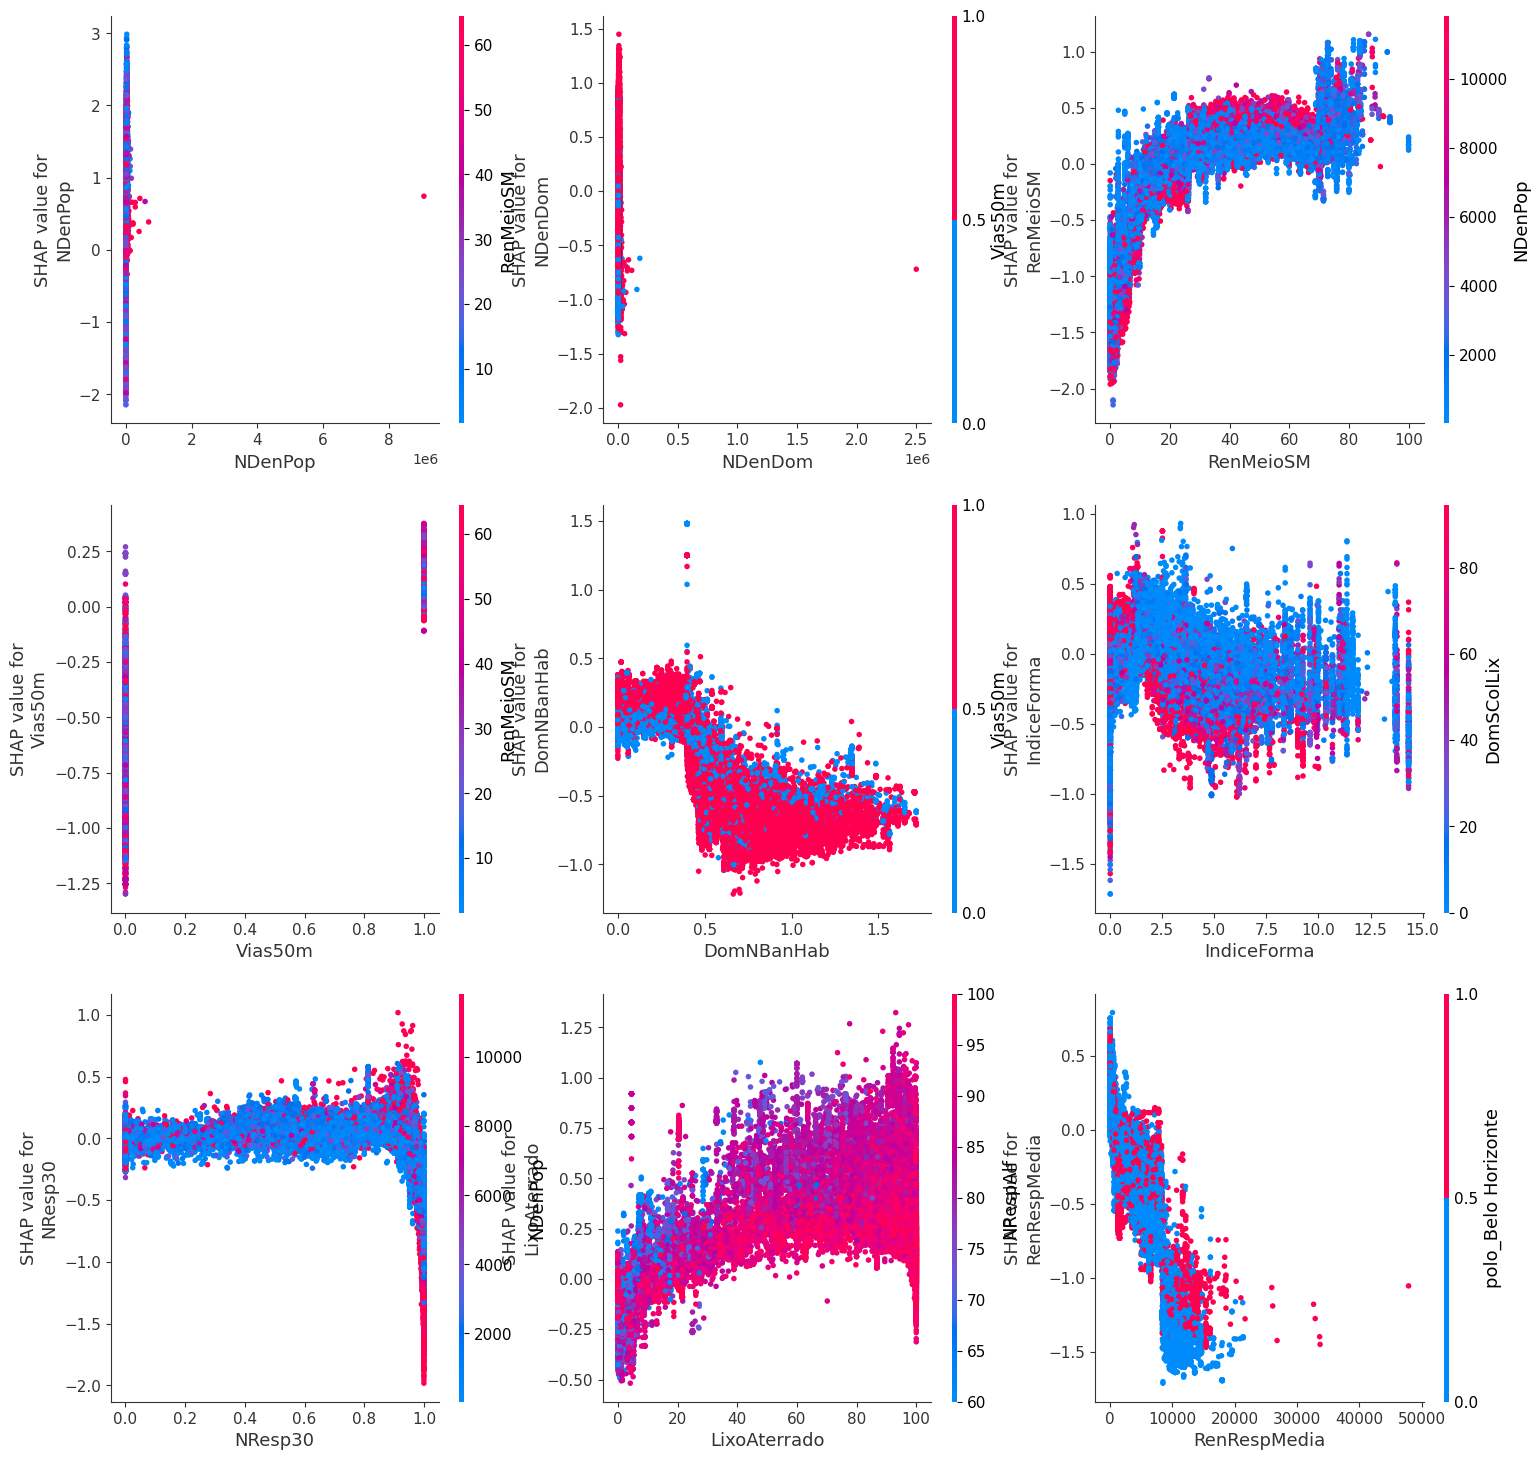

In [9]:

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
a, b, col = 0, 0, 0
while col < 9:
    if b == 3:
        b = 0
        a += 1
    shap.dependence_plot(feature_importance[col], shap_values, X_test, ax=ax[a, b], show=False)
    b += 1
    col += 1
    